# Домашнее задание 
Анализ данных

# Ultra Pro

Возьмите базу квартир (moscow_parsed_simple.csv). Проведите парсинг и очистку данных. Переведите все параметры в числовой формат и рассчитайте корреляцию. Напишите выводы.


In [ ]:
%matplotlib inline

import seaborn as sns # Будем визулизировать данные этой библиотекой
import pandas as pd # Библиотека для работы с датафреймом
from tensorflow.keras import utils # Будем использовать эту библиотеку для 
import numpy as np # Библиотека для работы с массивами
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой

import re # Регулряные выражения для эффективной работы со строками

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

In [ ]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] =15, 10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mos = pd.read_csv('/content/drive/MyDrive/moscow_parsed_simple.csv')
mos

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции
0,0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,NaN,25.07.2019,1.0
1,1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,NaN,25.07.2019,2.0
2,2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,NaN,25.07.2019,4.0
3,3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,NaN,NaN,25.07.2019,7.0
4,4,1,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0,NaN,NaN,25.07.2019,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126263,126263,Ст,Некрасовка м.,4п,2/17 П,NaN,NaN,19.8/?/?,2850000.0,NaN,NaN,12.07.2019,14.0
126264,126264,Ст,Авиамоторная м.,6п,2/8 К,NaN,С,20.4/18/?,3839990.0,NaN,NaN,23.07.2019,14.0
126265,126265,Ст,Коломенская м.,15п,1/9 П,NaN,NaN,15.4/13.2/?,2900000.0,NaN,NaN,12.07.2019,14.0
126266,126266,Ст,Алтуфьево м.,5т,4/9 М,NaN,NaN,26/10.9/7,5200000.0,NaN,NaN,22.07.2019,14.0


In [ ]:
mos.Дата[100:150]

In [ ]:
mos = mos.drop(mos[mos['Комнат'].str.contains('\d\d.\w\w\w', na=False)].index, axis = 0) # Удаляю выбросы - даты вместо количества комнат
mos = mos.drop(mos[mos['Площадь'].str.contains('\d\d.\d\d.\d\d\d\d')].index, axis = 0)   # Удаляю выбросы - даты вместо площади
mos = mos.drop(mos.columns[[0,9,10,11,12]],axis=1 ) # удаляем неинтересующие нас столбцы
mos.head()

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб."
0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0
2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0
4,1,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0


In [ ]:
# География цен
expert = mos.groupby('Метро / ЖД станции')['Цена, руб.'].agg(['count','mean']).sort_values('Метро / ЖД станции').astype('int')
expert[:40]

In [ ]:
def getsquare(i):         # Преобразовал код в функцию
  i=re.split(r'/', i)
  arg=i[0]
  if arg != '?':
    arg=np.float_(arg)
    i = arg
    return i

In [ ]:
def getLive(i):         # Преобразовал код в функцию
  i=re.split(r'/', i)
  arg=i[1]
  if arg != '?':
    arg=np.float_(arg)
    i = arg
    return i

In [ ]:
def getKitchen(i):         # Преобразовал код в функцию
  i=re.split(r'/', i)
  arg=i[2]
  if arg != '?':
    arg=np.float_(arg)
    i = arg
    return i

In [ ]:
mos['Общая площадь'] = mos['Площадь'].apply(getsquare)
mos['Жилая площадь'] = mos['Площадь'].apply(getLive)
mos['Площадь кухни'] = mos['Площадь'].apply(getKitchen)
mos['Этаж']=mos['Дом']

In [ ]:
def getLevel(i):         # Преобразовал код в функцию
  i=re.split(r' ', i)
  arg=i[0]
  if arg != '?':
    i = arg
    return i

In [ ]:
mos['Этаж'] = mos['Этаж'].apply(getLevel)

In [ ]:
def getType(i):         # Преобразовал код в функцию
  i=re.split(r' ', i)
  arg=i[1]
  i = arg
  return i

In [ ]:
mos['Дом'] = mos['Дом'].apply(getType)

In [ ]:
# Тип дома
def getFullType(arg):
  result = ''
  if ("М" in arg): result += 'монолитный'
  if ("К" in arg):  result += 'кирпичный'
  if ("П" in arg):  result += 'панельный'
 
  if result=='?':
    result='Не указано'
  return result

In [ ]:
mos['Дом'] = mos['Дом'].apply(getFullType)

In [ ]:
mos['вид транспорта'] = mos['От станции'].str.extract(r'(\D+)', expand=False) 

In [ ]:
# От станции
def getTransp(arg):
  arg = str(arg)
  result = ''
  if ("п" in arg): result += 'минут пешком'
  if ("т" in arg):  result += 'минут на транспорте'

 
 
  if result=='':
    result='Не указано'
  return result

In [ ]:
mos['Метро / ЖД станции'].unique()

In [ ]:
mos['время'] = mos['От станции'].str.extract(r'(\d+)', expand=False) 
mos['вид транспорта'] = mos['вид транспорта'].apply(getTransp)


In [ ]:
mos['Цена, млн руб.'] = mos['Цена, руб.']/1000000
mos.drop('Цена, руб.', axis=1, inplace=True) # Удаляем колонку "Цена, руб." из датафрейма


In [ ]:
mos

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,Общая площадь,Жилая площадь,Площадь кухни,Этаж,вид транспорта,время,"Цена, млн руб."
0,1,Шелепиха м.,12п,монолитный,NaN,2,64.1/23/20,64.1,23.0,20.0,35/37,минут пешком,12,19.50000
1,1,Пятницкое шоссе м.,30т,панельный,Л,Р,38.4/17/9,38.4,17.0,9.0,11/14,минут на транспорте,30,4.80000
2,1,Планерная м.,5т,панельный,Б,С,38.2/19.9/9.9,38.2,19.9,9.9,11/22,минут на транспорте,5,7.99000
3,1,Шаболовская м.,12п,,Б,Р,38/15/7,38.0,15.0,7.0,8/12,минут пешком,12,11.20000
4,1,Бабушкинская м.,15п,панельный,NaN,С,34/17/8,34.0,17.0,8.0,4/14,минут пешком,15,6.25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,панельный,NaN,NaN,19.8/?/?,19.8,NaN,NaN,2/17,минут пешком,4,2.85000
126264,Ст,Авиамоторная м.,6п,кирпичный,NaN,С,20.4/18/?,20.4,18.0,NaN,2/8,минут пешком,6,3.83999
126265,Ст,Коломенская м.,15п,панельный,NaN,NaN,15.4/13.2/?,15.4,13.2,NaN,1/9,минут пешком,15,2.90000
126266,Ст,Алтуфьево м.,5т,монолитный,NaN,NaN,26/10.9/7,26.0,10.9,7.0,4/9,минут на транспорте,5,5.20000


In [ ]:
mos['Этажность дома']=mos['Этаж']

In [ ]:
def getsFloor(i):         # Преобразовал код в функцию
  i=re.split(r'/', i)
  arg=i[0]
  if arg != '?':
    arg=np.float_(arg)
    i = arg
    return i

In [ ]:
def getsFloorH(i):         # Преобразовал код в функцию
  i=re.split(r'/', i)
  arg=i[1]
  if arg != '?':
    arg=np.float_(arg)
    i = arg
    return i

In [ ]:
mos['Этажность дома']=mos['Этаж'].apply(getsFloorH)
mos['Этаж']=mos['Этаж'].apply(getsFloor)

In [ ]:
mos['Высота этажа в доме']=mos['Этаж']/mos['Этажность дома']

In [ ]:
mos.drop('Площадь', axis=1, inplace=True) # Удаляем колонку Площадь из датафрейма
mos.drop('От станции', axis=1, inplace=True) # Удаляем колонку Площадь из датафрейма

In [ ]:
mos.loc[mos['Балкон'].isna(), 'Балкон'] = '0'
mos.loc[mos['Санузел'].isna(), 'Санузел'] = '0'
mos.loc[mos['Жилая площадь'].isna(), 'Жилая площадь'] = '0'
mos.loc[mos['Площадь кухни'].isna(), 'Площадь кухни'] = '0'
mos.loc[mos['Общая площадь'].isna(), 'Общая площадь'] = '0'
mos.loc[mos['Этажность дома'].isna(), 'Этажность дома'] = '0'
mos.loc[mos['Этаж'].isna(), 'Этаж'] = '0'
mos.loc[mos['Высота этажа в доме'].isna(), 'Высота этажа в доме'] = '0'

In [ ]:
mos

,Комнат,Метро / ЖД станции,Дом,Балкон,Санузел,Общая площадь,Жилая площадь,Площадь кухни,Этаж,вид транспорта,время,"Цена, млн руб.",Этажность дома,Высота этажа в доме
0,1,Шелепиха м.,монолитный,0,2,64.1,23,20,35,минут пешком,12,19.50000,37,0.945946
1,1,Пятницкое шоссе м.,панельный,Л,Р,38.4,17,9,11,минут на транспорте,30,4.80000,14,0.785714
2,1,Планерная м.,панельный,Б,С,38.2,19.9,9.9,11,минут на транспорте,5,7.99000,22,0.5
3,1,Шаболовская м.,,Б,Р,38,15,7,8,минут пешком,12,11.20000,12,0.666667
4,1,Бабушкинская м.,панельный,0,С,34,17,8,4,минут пешком,15,6.25000,14,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,панельный,0,0,19.8,0,0,2,минут пешком,4,2.85000,17,0.117647
126264,Ст,Авиамоторная м.,кирпичный,0,С,20.4,18,0,2,минут пешком,6,3.83999,8,0.25
126265,Ст,Коломенская м.,панельный,0,0,15.4,13.2,0,1,минут пешком,15,2.90000,9,0.111111
126266,Ст,Алтуфьево м.,монолитный,0,0,26,10.9,7,4,минут на транспорте,5,5.20000,9,0.444444


In [ ]:
# Данные о доме
def getParHome(arg):
  out = 0 # индекс для неуказанного пола
  
  if(arg == "монолитный"):
    out = 1
  elif(arg == "панельный"):
    out = 2
  elif(arg == "кирпичный"):
    out = 3
  elif(arg == "монолитныйкирпичный"):
    out = 4
    

  return list(utils.to_categorical(out, 5).astype('int'))

In [ ]:
# Данные о санузле
def getParBathroom(arg):
  out = 0 # индекс для неуказанного пола
  
  if(arg == "0")|(arg == '-'):
    out = 0
  elif(arg == "Р")|(arg == 'С')|(arg == '+'):
    out = 1
  elif(arg == "2")|(arg == '2С')|(arg == '2Р'):
    out = 2
  elif(arg == "3")|(arg == '3С')|(arg == '3Р'):
    out = 3
  elif(arg == "4")|(arg == '4С')|(arg == '4Р'):
    out = 4
      

  return list(utils.to_categorical(out, 5).astype('int'))

In [ ]:
# Данные о балконе
def getParBalkony(arg):
  out = 0 # индекс для неуказанного
  if (arg == '0')|(arg == '-'): 
    out = 0
  if (arg == 'Л')|(arg == 'Б')|(arg == 'БЛ')|(arg == 'Эрк')|(arg == 'ЭркЛ')|(arg == '*Л')|(arg == '*Б'):  
    out = 1
  if (arg == "2Б")|(arg == "2Л"):  
    out = 2
  if (arg == "3Б")|(arg == "Б2Л")|(arg == "3Л"):     
    out = 3
  if (arg == "2Б2Л")|(arg == "Б2Л")|(arg == "4Л"):     
    out = 4
 
    
  return list(utils.to_categorical(out, 5).astype('int'))

In [ ]:
# Данные о виде транспорта
def getTTransp(arg):
  out = 0 # индекс для неуказанного 
  if(arg == "минут пешком"):
    out = 1
  elif(arg == "минут на транспорте"):
    out = 2
     

  return list(utils.to_categorical(out, 3).astype('int'))

In [ ]:
#mos['Дом']=mos['Дом'].apply(getParHome)
#mos['Балкон']=mos['Балкон'].apply(getParBalkony)
#mos['Санузел']=mos['Санузел'].apply(getParBathroom)
#mos['вид транспорта']=mos['вид транспорта'].apply(getTTransp)
mos.loc[mos['Комнат'].isna(), 'Комнат'] = '0'
#mos['Комнат']=mos['Комнат'].apply(getRoom)
mos.loc[mos['время'].isna(), 'время'] = '0'

In [ ]:
# Данные о количестве комнат
def getRoom(arg):
  out = 0 # индекс для неуказанного
  if (arg == '0'): 
    out = 0
  if (arg == 1.0)|(arg == '1')|(arg == 'Ст'):  
    out = 1
  if (arg == 2.0)|(arg == "2"):  
    out = 2
  if (arg == "4"):     
    out = 3
  if (arg == "5"):     
    out = 4
  if (arg == "6")|(arg == '7')|(arg == '8')|(arg == '9')|(arg == '10'):     
    out = 5
  if (arg == "11")|(arg == '12')|(arg == '13')|(arg == '14')|(arg == '15')|(arg == '16'):     
    out = 6
  if (arg == "20")|(arg == "30"):  
    out = 7

  
 
    
  return list(utils.to_categorical(out, 8).astype('int'))

In [ ]:
# Данные о Метро / ЖД станции
def getTranzit(arg):
  arg = str(arg)
  result = ''
  if ("станция" in arg): result += 'станция'
  if ("МЦК" in arg):  result += 'МЦК'
  if result=='':
    result='Метро'
    
  return result

In [ ]:
mos['Метро / ЖД станции'] = mos['Метро / ЖД станции'].apply(getTranzit)

In [ ]:
mos

,Комнат,Метро / ЖД станции,Дом,Балкон,Санузел,Общая площадь,Жилая площадь,Площадь кухни,Этаж,вид транспорта,время,"Цена, млн руб.",Этажность дома,Высота этажа в доме
0,1,Метро,монолитный,0,2,64.1,23,20,35,минут пешком,12,19.50000,37,0.945946
1,1,Метро,панельный,Л,Р,38.4,17,9,11,минут на транспорте,30,4.80000,14,0.785714
2,1,Метро,панельный,Б,С,38.2,19.9,9.9,11,минут на транспорте,5,7.99000,22,0.5
3,1,Метро,,Б,Р,38,15,7,8,минут пешком,12,11.20000,12,0.666667
4,1,Метро,панельный,0,С,34,17,8,4,минут пешком,15,6.25000,14,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Метро,панельный,0,0,19.8,0,0,2,минут пешком,4,2.85000,17,0.117647
126264,Ст,Метро,кирпичный,0,С,20.4,18,0,2,минут пешком,6,3.83999,8,0.25
126265,Ст,Метро,панельный,0,0,15.4,13.2,0,1,минут пешком,15,2.90000,9,0.111111
126266,Ст,Метро,монолитный,0,0,26,10.9,7,4,минут на транспорте,5,5.20000,9,0.444444


In [ ]:
# Данные о Метро / ЖД станции
def getTTranzit(arg):
  out = 0 # индекс для неуказанного 
  if(arg == "метро"):
    out = 0
  elif(arg == "МЦК"):
    out = 1
  elif(arg == "станция"):
    out = 2
     

  return list(utils.to_categorical(out, 3).astype('int'))

In [ ]:
#mos['Метро / ЖД станции'] = mos['Метро / ЖД станции'].apply(getTTranzit)

In [ ]:
getTTranzit('метро')

[1, 0, 0]

In [ ]:
# Категориальное представление жилой площади
def getfulls(arg):
  out = int(arg)
  outClass = 0 # по умолчанию < 0 кв.м.
  if (out > 10):   # если больше 10 кв.м.
    outClass = 1
  if (out > 20):  # если больше 20 кв.м.
    outClass = 2
  if (out > 25):  # если больше 25 кв.м.
    outClass = 3
  if (out > 30):  # если больше 30 кв.м.
    outClass = 4
  if (out > 35):  # если больше 35 кв.м.
    outClass = 5
  if (out > 40):  # если больше 40 кв.м.
    outClass = 6
  if (out > 45): # если больше 45 кв.м.
    outClass = 7
  if (out > 50): # если больше 50 кв.м.
    outClass = 8
  if (out > 60): # если больше 60 кв.м.
    outClass = 9 
  if (out > 70): # если больше 70 кв.м.
    outClass = 10
  if (out > 90): # если больше 90 кв.м.
    outClass = 11
  if (out > 100): # если больше 100 кв.м.
    outClass = 12
  if (out > 120): # если больше 120 кв.м.
    outClass = 13
  if (out > 150): # если больше 150 кв.м.
    outClass = 14
  if (out > 200): # если больше 200 кв.м.
    outClass = 15
  if (out > 250): # если больше 250 кв.м.
    outClass = 16
  if (out > 350): # если больше 350 кв.м.
    outClass = 17
  if (out > 500): # если больше 500 кв.м.
    outClass = 18
  
  return list(utils.to_categorical(outClass, 19).astype('int'))


  # Категориальное представление жилой площади
def getlives(arg):
  out = int(arg)
  outClass = 0 # по умолчанию < 0 кв.м.
  if (out > 10):   # если больше 10 кв.м.
    outClass = 1
  if (out > 20):  # если больше 20 кв.м.
    outClass = 2
  if (out > 25):  # если больше 25 кв.м.
    outClass = 3
  if (out > 30):  # если больше 30 кв.м.
    outClass = 4
  if (out > 35):  # если больше 35 кв.м.
    outClass = 5
  if (out > 40):  # если больше 40 кв.м.
    outClass = 6
  if (out > 45): # если больше 45 кв.м.
    outClass = 7
  if (out > 50): # если больше 50 кв.м.
    outClass = 8
  if (out > 60): # если больше 60 кв.м.
    outClass = 9 
  if (out > 70): # если больше 70 кв.м.
    outClass = 10
  if (out > 90): # если больше 90 кв.м.
    outClass = 11
  if (out > 100): # если больше 100 кв.м.
    outClass = 12
  if (out > 120): # если больше 120 кв.м.
    outClass = 13
  if (out > 150): # если больше 150 кв.м.
    outClass = 14
  if (out > 200): # если больше 200 кв.м.
    outClass = 15
  if (out > 250): # если больше 250 кв.м.
    outClass = 16
  if (out > 350): # если больше 350 кв.м.
    outClass = 17
  if (out > 500): # если больше 500 кв.м.
    outClass = 18
  
  return list(utils.to_categorical(outClass, 19).astype('int'))


  # Категориальное представление жилой площади
def getKitchens(arg):
  out = int(arg)
  outClass = 0 # по умолчанию < 0 кв.м.
  if (out > 10):   # если больше 10 кв.м.
    outClass = 1
  if (out > 15):  # если больше 15 кв.м.
    outClass = 2
  if (out > 20):  # если больше 20 кв.м.
    outClass = 3
  if (out > 25):  # если больше 25 кв.м.
    outClass = 4
  if (out > 30):  # если больше 30 кв.м.
    outClass = 5
  if (out > 40):  # если больше 40 кв.м.
    outClass = 6
  if (out > 50): # если больше 50 кв.м.
    outClass = 7
  if (out > 70): # если больше 70 кв.м.
    outClass = 8
  if (out > 100): # если больше 100 кв.м.
    outClass = 9 
  if (out > 200): # если больше 200 кв.м.
    outClass = 10
  
  
  return list(utils.to_categorical(outClass, 11).astype('int'))


   # Категориальное представление этажа
def getKodLev(arg):
  out = int(arg)
  outClass = 0 # по умолчанию < 0 кв.м.
  if (out > 1):   # если выше 1 этажа
    outClass = 1
  if (out > 2):  # если выше 2 этажа
    outClass = 2
  if (out > 4):  # если выше 4 этажа
    outClass = 3
  if (out > 5):  # если выше 5 этажа
    outClass = 4
  if (out > 8):  # если выше 8 этажа
    outClass = 5
  if (out > 9):  # если выше 9 этажа
    outClass = 6
  if (out > 12): # если выше 12 этажа
    outClass = 7
  if (out > 15): # если выше 15 этажа
    outClass = 8
  if (out > 17): # если выше 17 этажа
    outClass = 9 
  if (out > 25): # если выше 25 этажа
    outClass = 10
  if (out > 35): # если выше 35 этажа
    outClass = 11
  
  
  return list(utils.to_categorical(outClass, 12).astype('int'))


    # Категориальное представление этажности дома
def getKodLeving(arg):
  out = int(arg)
  outClass = 0 # по умолчанию < 0 кв.м.
  if (out > 1):   # если выше 1 этажа
    outClass = 1
  if (out > 2):  # если выше 2 этажа
    outClass = 2
  if (out > 4):  # если выше 4 этажа
    outClass = 3
  if (out > 5):  # если выше 5 этажа
    outClass = 4
  if (out > 8):  # если выше 8 этажа
    outClass = 5
  if (out > 9):  # если выше 9 этажа
    outClass = 6
  if (out > 12): # если выше 12 этажа
    outClass = 7
  if (out > 15): # если выше 15 этажа
    outClass = 8
  if (out > 17): # если выше 17 этажа
    outClass = 9 
  if (out > 25): # если выше 25 этажа
    outClass = 10
  if (out > 35): # если выше 35 этажа
    outClass = 11
  
  
  return list(utils.to_categorical(outClass, 12).astype('int'))


    # Категориальное представление времени
def getKodTime(arg):
  out = int(arg)
  outClass = 0 # по умолчанию < 0 кв.м.
  if (out < 5):   # если менее 5 минут
    outClass = 1
  if (out < 10):  # если менее 10 минут
    outClass = 2
  if (out < 15):  # если менее 15 минут
    outClass = 3
  if (out < 20):  # если менее 20 минут
    outClass = 4
  if (out < 25):  # если менее 25 минут
    outClass = 5
  if (out >= 25):  # если равно и более 25 минут
    outClass = 6
  
  
  
  return list(utils.to_categorical(outClass, 7).astype('int'))


     # Категориальное представление расположения этажа относительно высоты дома
def getKodLevPr(arg):
  out = int(arg)
  outClass = 0 # по умолчанию  0 кв.м.
  if (out > 0):   # значение коэффициента
    outClass = 1
  if (out > 0.1):  # значение коэффициента
    outClass = 2
  if (out > 0.2):  # значение коэффициента
    outClass = 3
  if (out > 0.25):  # значение коэффициента
    outClass = 4
  if (out > 0.5):  # значение коэффициента
    outClass = 5
  if (out > 0.8):  # значение коэффициента
    outClass = 6
  if (out > 0.9):  # значение коэффициента
    outClass = 7
  
  
  
  return list(utils.to_categorical(outClass, 8).astype('int'))

In [ ]:
mos

,Комнат,Метро / ЖД станции,Дом,Балкон,Санузел,Общая площадь,Жилая площадь,Площадь кухни,Этаж,вид транспорта,время,"Цена, млн руб.",Этажность дома,Высота этажа в доме
0,1,Метро,монолитный,0,2,64.1,23,20,35,минут пешком,12,19.50000,37,0.945946
1,1,Метро,панельный,Л,Р,38.4,17,9,11,минут на транспорте,30,4.80000,14,0.785714
2,1,Метро,панельный,Б,С,38.2,19.9,9.9,11,минут на транспорте,5,7.99000,22,0.5
3,1,Метро,,Б,Р,38,15,7,8,минут пешком,12,11.20000,12,0.666667
4,1,Метро,панельный,0,С,34,17,8,4,минут пешком,15,6.25000,14,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Метро,панельный,0,0,19.8,0,0,2,минут пешком,4,2.85000,17,0.117647
126264,Ст,Метро,кирпичный,0,С,20.4,18,0,2,минут пешком,6,3.83999,8,0.25
126265,Ст,Метро,панельный,0,0,15.4,13.2,0,1,минут пешком,15,2.90000,9,0.111111
126266,Ст,Метро,монолитный,0,0,26,10.9,7,4,минут на транспорте,5,5.20000,9,0.444444


In [ ]:
# Извлекаем все параметры
def getAllParameters(val):
  Room = getRoom(val[0])                                # Параметры комнат
  Tranzit = getTTranzit(val[1])                  # Параметры средств транспорта
  Home = getParHome(val[2])                      # Параметры о доме
  Balkon = getParBalkony(val[3])                 # Параметры о балконах
  Bath = getParBathroom(val[4])                  # Параметры о санузле
  fulls = getfulls(val[5])                       # Параметры об общей площади
  Lives = getlives(val[6])                       # Параметры о жилой площади
  Kitchens = getKitchens(val[7])                 # Параметры о площади кухни
  KodLev = getKodLev(val[8])                     # Параметры об этаже                    
  TTransp = getTTransp(val[9])                   # Параметры о виде транспорта
  KodTime = getKodTime(val[10])                  # Параметры о времени
  KodLeving = getKodLeving(val[11])              # Параметры об этажности дома
  KodLevPr = getKodLevPr(val[12])                # Параметры о К этажности
  
  out = [] 
  
# Склеиваем все параметры в вектор  
  out += Room
  out += Tranzit
  out += Home
  out += Balkon
  out += Bath
  out += fulls
  out += Lives
  out += Kitchens
  out += KodLev
  out += TTransp
  out += KodTime
  out += KodLeving
  out += KodLevPr
  
  return out

def get01Data(values):
  vals = [] # Здесь будем хранить кодированные значения
  sals = [] # Здесь будем хранить данные о Цене
  
  for val in values:
    y = val[11] 
    
    x = getAllParameters(val)
    vals.append(x)
    sals.append(y)
  
  vals = np.array(vals)
  sals = np.array(sals)
  
  return (vals, sals)

In [ ]:
vals, salary = get01Data(mos.values) # .values - значения базы, извлекаем их

In [ ]:

 
categorical = pd.DataFrame(
    {'Комнат': [np.argmax(i) for i in vals[:,0:8]],                                                                
     'Метро / ЖД станции':[np.argmax(i) for i in vals[:,8:11]],
     'Дом':[np.argmax(i) for i in vals[:,11:16]],
     'Балкон':[np.argmax(i) for i in vals[:,16:21]],
     'Санузел': [np.argmax(i) for i in vals[:,21:26]],
     'Общая площадь': [np.argmax(i) for i in vals[:,26:45]],
     'Жилая площадь': [np.argmax(i) for i in vals[:,45:64]],
     'Площадь кухни': [np.argmax(i) for i in vals[:,64:75]],
     'Этаж':  [np.argmax(i) for i in vals[:,75:87]],
     'вид транспорта': [np.argmax(i) for i in vals[:,87:90]],
     'время':  [np.argmax(i) for i in vals[:,90:97]],
     'Этажность дома':  [np.argmax(i) for i in vals[:,97:109]],    
     'Высота этажа в доме':  [np.argmax(i) for i in vals[:,109:118]],                  
     'Цена, млн руб.':salary})

categorical.head(10) # основные статистические данные по базе

,Комнат,Метро / ЖД станции,Дом,Балкон,Санузел,Общая площадь,Жилая площадь,Площадь кухни,Этаж,вид транспорта,время,Этажность дома,Высота этажа в доме,"Цена, млн руб."
0,1,0,1,0,2,9,2,2,10,1,5,9,7,19.500000
1,1,0,2,1,1,5,1,0,6,2,6,2,7,4.800000
2,1,0,2,1,1,5,1,0,6,2,5,4,7,7.990000
3,1,0,0,1,1,5,1,0,4,1,5,6,7,11.200000
4,1,0,2,0,1,4,1,0,2,1,5,4,7,6.250000
5,1,0,3,0,0,6,1,2,5,1,5,6,7,12.700000
6,1,0,2,1,1,6,1,0,4,1,5,4,7,6.500000
7,1,0,3,1,1,4,1,0,1,1,5,4,7,6.000000
8,1,0,2,2,0,5,1,0,4,1,5,4,7,8.900000
9,1,0,4,0,0,3,1,0,6,1,5,3,7,5.999984


In [ ]:
categorical['Комнат'].nunique()

8

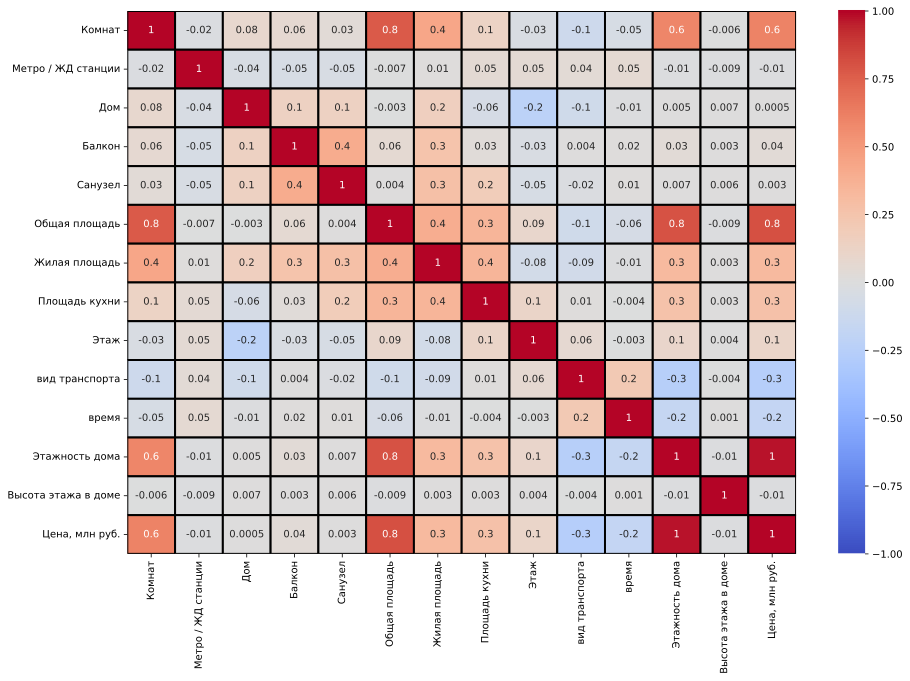

In [ ]:
rcParams['figure.figsize'] = 15, 10 # увеличим размер графиков
# Метод, подсчитывающий попарную корреляцию для элементов.
corr_matrix = categorical.corr('spearman') 
# Можно указать в параметрах способ подсчета.
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')  

По представленным данным можно обнаружить, что при выборе квартиры очень высокая корелляция с количеством этажей в доме. Объяснить можно тем, что малоэтажное домостроение замещается высотным, а квартиры в новых домах, как правило востребованнее. Плотная взаимосвязь с общей площадью, а вот жилая и площадь кухни оказывают гораздо меньшее влияние. Количество комнат также ценится. А вот расположение этажа в доме уже не имеет того влияния, что ранее, когда важно было иметь не первый и не последний этаж. Расположение торгово-офисной инфраструктуры на первых этажах и современная защита кровли, нивелировала эту ценность.